In [1]:
import pandas as pd

In [2]:
#csv 불러오기
corona_df = pd.read_csv('./corona.csv') #'./'는 생략가능  => 상대경로 
#corona_df

In [3]:
#change columns
corona_df.columns = ["인덱스","등록일시","사망자",
                    "확진자","게시글번호","기준일",
                    "기준시간","수정일시","누적의심자","누적확진률"]
#corona_df


In [4]:
corona_df.describe()  #통계수치 제시 

,인덱스,사망자,확진자,게시글번호,기준일,누적의심자,누적확진률
count,720.000000,720.000000,7.200000e+02,720.000000,7.200000e+02,6.920000e+02,623.000000
mean,359.500000,1840.476389,2.135333e+05,419.370833,2.020738e+07,7.545057e+06,1.556435
std,207.990384,1842.137253,3.673034e+05,218.672197,6.076163e+03,6.172020e+06,0.543014
min,0.000000,54.000000,7.513000e+03,51.000000,2.020031e+07,2.101440e+05,0.902205
25%,179.750000,335.500000,2.126525e+04,231.750000,2.020091e+07,1.934309e+06,1.078089
50%,359.500000,1629.500000,9.183800e+04,411.500000,2.021031e+07,6.368310e+06,1.416159
75%,539.250000,2294.750000,2.539270e+05,621.250000,2.021090e+07,1.216890e+07,1.816009
max,719.000000,8058.000000,3.134456e+06,803.000000,2.022023e+07,2.151807e+07,3.919308


In [5]:
corona_df["누적확진률"].describe()

count    623.000000
mean       1.556435
std        0.543014
min        0.902205
25%        1.078089
50%        1.416159
75%        1.816009
max        3.919308
Name: 누적확진률, dtype: float64

In [6]:
corona_df.사망자  #str표시 안해줌 

0      8058
1      7944
2      7895
3      7783
4      7689
       ... 
715      72
716      67
717      66
718      60
719      54
Name: 사망자, Length: 720, dtype: int64

In [7]:
corona_df["기준일"]

0      20220228
1      20220227
2      20220226
3      20220225
4      20220224
         ...   
715    20200314
716    20200313
717    20200312
718    20200311
719    20200310
Name: 기준일, Length: 720, dtype: int64

In [8]:
corona_df_2 = corona_df.sort_values("등록일시")  #내림차순(ascending=False)
#corona_df_2 #등록일시 오름차순으로 정리 

In [9]:
#일별 확진자 -> shift 함수 사용  shift(N):N행씩 이동 
corona_df_2["일일 확진자"] = (corona_df_2["확진자"]-corona_df_2["확진자"].shift()).fillna(0)  #fillna(0)데이터 열에서 모든 NaN값을 0으로 바꿈
#corona_df_2

In [10]:
#일일 사망자  diff() 사용 
corona_df_2["일일 사망자"] = corona_df_2["사망자"].diff().fillna(0)
#corona_df_2

In [11]:
corona_df_2["일일 사망자"].value_counts(ascending = True)
#일일 사망자 수가 같은 날짜 끼리 

 114.0      1
 47.0       1
 41.0       1
-2.0        1
 64.0       1
         ... 
 4.0       49
 3.0       63
 0.0       80
 2.0       85
 1.0      110
Name: 일일 사망자, Length: 73, dtype: int64

In [12]:
#필요없는 컬럼 지우기   #행 지울때는 drop(['index'],axis=0)
corona_df_3 = corona_df_2.drop(["인덱스","게시글번호","기준일",
                                "기준시간","수정일시"],axis=1)
#corona_df_3

In [13]:
corona_df_3.reset_index(drop = True, inplace=True)   
#기존의 index 사라지게 해줌 / inplace=True : 원본데이터 바꿈 /False: 원본데이터 유지 

In [14]:
corona_df_3

,등록일시,사망자,확진자,누적의심자,누적확진률,일일 확진자,일일 사망자
0,2020-03-10 00:00:00.000,54,7513,210144.0,3.919308,0.0,0.0
1,2020-03-11 00:00:00.000,60,7755,222395.0,3.804175,242.0,6.0
2,2020-03-12 00:00:00.000,66,7869,234998.0,3.621744,114.0,6.0
3,2020-03-13 00:00:00.000,67,7979,248647.0,3.458499,110.0,1.0
4,2020-03-14 00:00:00.000,72,8086,261335.0,3.318000,107.0,5.0
...,...,...,...,...,...,...,...
715,2022-02-24 09:45:42.528,7689,2499187,NaN,NaN,170015.0,82.0
716,2022-02-25 09:19:35.533,7783,2665074,NaN,NaN,165887.0,94.0
717,2022-02-26 09:10:30.918,7895,2831275,NaN,NaN,166201.0,112.0
718,2022-02-27 08:54:59.059,7944,2994830,NaN,NaN,163555.0,49.0


In [15]:
#결측치 바꾸기
corona_df_3.fillna(0)

,등록일시,사망자,확진자,누적의심자,누적확진률,일일 확진자,일일 사망자
0,2020-03-10 00:00:00.000,54,7513,210144.0,3.919308,0.0,0.0
1,2020-03-11 00:00:00.000,60,7755,222395.0,3.804175,242.0,6.0
2,2020-03-12 00:00:00.000,66,7869,234998.0,3.621744,114.0,6.0
3,2020-03-13 00:00:00.000,67,7979,248647.0,3.458499,110.0,1.0
4,2020-03-14 00:00:00.000,72,8086,261335.0,3.318000,107.0,5.0
...,...,...,...,...,...,...,...
715,2022-02-24 09:45:42.528,7689,2499187,0.0,0.000000,170015.0,82.0
716,2022-02-25 09:19:35.533,7783,2665074,0.0,0.000000,165887.0,94.0
717,2022-02-26 09:10:30.918,7895,2831275,0.0,0.000000,166201.0,112.0
718,2022-02-27 08:54:59.059,7944,2994830,0.0,0.000000,163555.0,49.0


In [16]:
corona_df_4 = corona_df_3.tail(50)#.fillna(0)
corona_df_4

,등록일시,사망자,확진자,누적의심자,누적확진률,일일 확진자,일일 사망자
670,2022-01-10 09:06:03.096,6071,667379,20148476.0,NaN,3005.0,34.0
671,2022-01-11 09:07:41.087,6114,670471,20215297.0,NaN,3092.0,43.0
672,2022-01-12 09:08:49.646,6166,674854,20277357.0,NaN,4383.0,52.0
673,2022-01-13 08:43:16.692,6210,679018,20329715.0,NaN,4164.0,44.0
674,2022-01-14 08:59:27.905,6259,683556,20389154.0,NaN,4538.0,49.0
675,2022-01-15 08:17:22.717,6281,687975,20446099.0,NaN,4419.0,22.0
676,2022-01-16 09:31:40.897,6310,692164,20489023.0,NaN,4189.0,29.0
677,2022-01-17 09:03:38.424,6333,696018,20527722.0,NaN,3854.0,23.0
678,2022-01-18 09:03:38.28,6378,700080,20588481.0,NaN,4062.0,45.0
679,2022-01-19 09:01:30.801,6452,705883,20649522.0,NaN,5803.0,74.0


In [17]:
corona_df_4.fillna(method="ffill") #NaN 앞의 값으로 채우기

,등록일시,사망자,확진자,누적의심자,누적확진률,일일 확진자,일일 사망자
670,2022-01-10 09:06:03.096,6071,667379,20148476.0,NaN,3005.0,34.0
671,2022-01-11 09:07:41.087,6114,670471,20215297.0,NaN,3092.0,43.0
672,2022-01-12 09:08:49.646,6166,674854,20277357.0,NaN,4383.0,52.0
673,2022-01-13 08:43:16.692,6210,679018,20329715.0,NaN,4164.0,44.0
674,2022-01-14 08:59:27.905,6259,683556,20389154.0,NaN,4538.0,49.0
675,2022-01-15 08:17:22.717,6281,687975,20446099.0,NaN,4419.0,22.0
676,2022-01-16 09:31:40.897,6310,692164,20489023.0,NaN,4189.0,29.0
677,2022-01-17 09:03:38.424,6333,696018,20527722.0,NaN,3854.0,23.0
678,2022-01-18 09:03:38.28,6378,700080,20588481.0,NaN,4062.0,45.0
679,2022-01-19 09:01:30.801,6452,705883,20649522.0,NaN,5803.0,74.0


In [18]:
corona_df_4.fillna(corona_df_3.mean()) #평균값으로 채워주기

C:\Users\rumbi\AppData\Local\Temp\ipykernel_8504\1050031866.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  corona_df_4.fillna(corona_df_3.mean()) #평균값으로 채워주기


,등록일시,사망자,확진자,누적의심자,누적확진률,일일 확진자,일일 사망자
670,2022-01-10 09:06:03.096,6071,667379,2.014848e+07,1.556435,3005.0,34.0
671,2022-01-11 09:07:41.087,6114,670471,2.021530e+07,1.556435,3092.0,43.0
672,2022-01-12 09:08:49.646,6166,674854,2.027736e+07,1.556435,4383.0,52.0
673,2022-01-13 08:43:16.692,6210,679018,2.032972e+07,1.556435,4164.0,44.0
674,2022-01-14 08:59:27.905,6259,683556,2.038915e+07,1.556435,4538.0,49.0
675,2022-01-15 08:17:22.717,6281,687975,2.044610e+07,1.556435,4419.0,22.0
676,2022-01-16 09:31:40.897,6310,692164,2.048902e+07,1.556435,4189.0,29.0
677,2022-01-17 09:03:38.424,6333,696018,2.052772e+07,1.556435,3854.0,23.0
678,2022-01-18 09:03:38.28,6378,700080,2.058848e+07,1.556435,4062.0,45.0
679,2022-01-19 09:01:30.801,6452,705883,2.064952e+07,1.556435,5803.0,74.0


In [19]:
import matplotlib.pyplot as plt

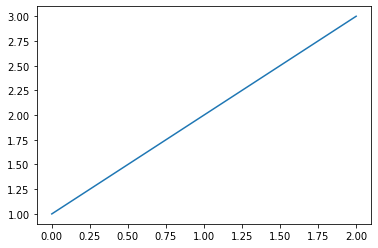

In [20]:
plt.plot([1,2,3])
plt.show()

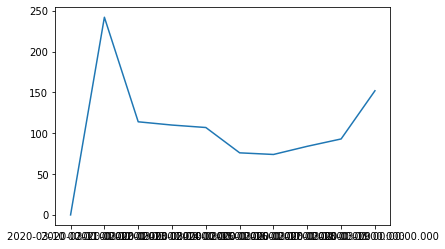

In [21]:
#컬럼값 리스트로 만들기
decide_cnt  = corona_df_3.head(10)["일일 확진자"].values.tolist()  #=>Series 형태를 List로 
state_dt = corona_df_3.head(10)["등록일시"].values.tolist() #tolist 안걸어도 됨

plt.plot(state_dt,decide_cnt) #(x축, y축)
plt.show()

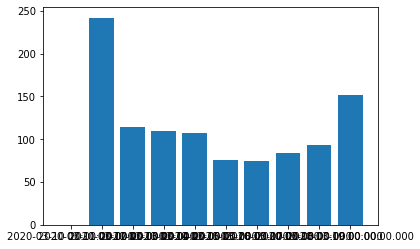

In [22]:
decide_cnt  = corona_df_3.head(10)["일일 확진자"].values.tolist()  #=>Series 형태를 List로 
state_dt = corona_df_3.head(10)["등록일시"].values.tolist()

plt.bar(state_dt,decide_cnt) #(x축, y축)
plt.show()

#산점도: scatter

In [23]:
values=[1,2,3,4,5,1,2,3]
test=pd.DataFrame(values)
test

,0
0,1
1,2
2,3
3,4
4,5
5,1
6,2
7,3


In [24]:
test.columns=["A"]
test

,A
0,1
1,2
2,3
3,4
4,5
5,1
6,2
7,3


In [25]:
test["B"] = test["A"].apply(lambda x : 0 if (x <= 3) else 1)
test

,A,B
0,1,0
1,2,0
2,3,0
3,4,1
4,5,1
5,1,0
6,2,0
7,3,0


In [26]:
#누적확진률 (3.5보다 크면 high 작으면 row ,axis=1)

corona_df_3["H/L"] = corona_df_3["누적확진률"].apply(lambda x : 'High' if (x >= 3.5) else 'Low')
corona_df_3


,등록일시,사망자,확진자,누적의심자,누적확진률,일일 확진자,일일 사망자,H/L
0,2020-03-10 00:00:00.000,54,7513,210144.0,3.919308,0.0,0.0,High
1,2020-03-11 00:00:00.000,60,7755,222395.0,3.804175,242.0,6.0,High
2,2020-03-12 00:00:00.000,66,7869,234998.0,3.621744,114.0,6.0,High
3,2020-03-13 00:00:00.000,67,7979,248647.0,3.458499,110.0,1.0,Low
4,2020-03-14 00:00:00.000,72,8086,261335.0,3.318000,107.0,5.0,Low
...,...,...,...,...,...,...,...,...
715,2022-02-24 09:45:42.528,7689,2499187,NaN,NaN,170015.0,82.0,Low
716,2022-02-25 09:19:35.533,7783,2665074,NaN,NaN,165887.0,94.0,Low
717,2022-02-26 09:10:30.918,7895,2831275,NaN,NaN,166201.0,112.0,Low
718,2022-02-27 08:54:59.059,7944,2994830,NaN,NaN,163555.0,49.0,Low


In [27]:
#1&2 = 0 ,3&4 =1

def change(x):
    if x < 3:
        return 0
    elif x <5:
        return 1
    elif x < 7:
        return 2
    else:
        return 3
    
test.A = test.A.apply(change)
test

,A,B
0,0,0
1,0,0
2,1,0
3,1,1
4,2,1
5,0,0
6,0,0
7,1,0


In [28]:
corona_df_3["등록일시"]=pd.to_datetime(corona_df_3["등록일시"],
                                        format="%Y-%m-%d")
# 0:월요일 /6:일요일
corona_df_3["요일"] = corona_df_3["등록일시"].dt.weekday
corona_df_3.head(10)   

,등록일시,사망자,확진자,누적의심자,누적확진률,일일 확진자,일일 사망자,H/L,요일
0,2020-03-10,54,7513,210144.0,3.919308,0.0,0.0,High,1
1,2020-03-11,60,7755,222395.0,3.804175,242.0,6.0,High,2
2,2020-03-12,66,7869,234998.0,3.621744,114.0,6.0,High,3
3,2020-03-13,67,7979,248647.0,3.458499,110.0,1.0,Low,4
4,2020-03-14,72,8086,261335.0,3.318000,107.0,5.0,Low,5
5,2020-03-15,75,8162,268212.0,3.239660,76.0,3.0,Low,6
6,2020-03-16,75,8236,274504.0,3.173392,74.0,0.0,Low,0
7,2020-03-17,81,8320,286716.0,3.088058,84.0,6.0,Low,1
8,2020-03-18,84,8413,295647.0,3.012163,93.0,3.0,Low,2
9,2020-03-19,91,8565,307024.0,2.942086,152.0,7.0,Low,3


In [29]:
def chdt(x):
    if x == 0:
        return "Mon"
    elif x == 1:
        return "Tue"
    elif x == 2:
        return "Wed"
    elif x == 3:
        return "Thu"
    elif x == 4:
        return "Fri"
    elif x == 5:
        return "Sat"
    elif x == 6:
        return "Sun"
    else:
        return ""

corona_df_3["요일1"] = corona_df_3["요일"].apply(chdt)



corona_df_3


,등록일시,사망자,확진자,누적의심자,누적확진률,일일 확진자,일일 사망자,H/L,요일,요일1
0,2020-03-10 00:00:00.000,54,7513,210144.0,3.919308,0.0,0.0,High,1,Tue
1,2020-03-11 00:00:00.000,60,7755,222395.0,3.804175,242.0,6.0,High,2,Wed
2,2020-03-12 00:00:00.000,66,7869,234998.0,3.621744,114.0,6.0,High,3,Thu
3,2020-03-13 00:00:00.000,67,7979,248647.0,3.458499,110.0,1.0,Low,4,Fri
4,2020-03-14 00:00:00.000,72,8086,261335.0,3.318000,107.0,5.0,Low,5,Sat
...,...,...,...,...,...,...,...,...,...,...
715,2022-02-24 09:45:42.528,7689,2499187,NaN,NaN,170015.0,82.0,Low,3,Thu
716,2022-02-25 09:19:35.533,7783,2665074,NaN,NaN,165887.0,94.0,Low,4,Fri
717,2022-02-26 09:10:30.918,7895,2831275,NaN,NaN,166201.0,112.0,Low,5,Sat
718,2022-02-27 08:54:59.059,7944,2994830,NaN,NaN,163555.0,49.0,Low,6,Sun


In [30]:
def week(x):
    d = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
    return d[x]
corona_df_3["요일2"] = corona_df_3["요일"].apply(week)
corona_df_3

,등록일시,사망자,확진자,누적의심자,누적확진률,일일 확진자,일일 사망자,H/L,요일,요일1,요일2
0,2020-03-10 00:00:00.000,54,7513,210144.0,3.919308,0.0,0.0,High,1,Tue,Tue
1,2020-03-11 00:00:00.000,60,7755,222395.0,3.804175,242.0,6.0,High,2,Wed,Wed
2,2020-03-12 00:00:00.000,66,7869,234998.0,3.621744,114.0,6.0,High,3,Thu,Thu
3,2020-03-13 00:00:00.000,67,7979,248647.0,3.458499,110.0,1.0,Low,4,Fri,Fri
4,2020-03-14 00:00:00.000,72,8086,261335.0,3.318000,107.0,5.0,Low,5,Sat,Sat
...,...,...,...,...,...,...,...,...,...,...,...
715,2022-02-24 09:45:42.528,7689,2499187,NaN,NaN,170015.0,82.0,Low,3,Thu,Thu
716,2022-02-25 09:19:35.533,7783,2665074,NaN,NaN,165887.0,94.0,Low,4,Fri,Fri
717,2022-02-26 09:10:30.918,7895,2831275,NaN,NaN,166201.0,112.0,Low,5,Sat,Sat
718,2022-02-27 08:54:59.059,7944,2994830,NaN,NaN,163555.0,49.0,Low,6,Sun,Sun


In [31]:
d = ["M","T","W","T","F","S","S"]
corona_df_3["요일3"]=corona_df_3["요일"].apply(lambda x :d[x])
corona_df_3


,등록일시,사망자,확진자,누적의심자,누적확진률,일일 확진자,일일 사망자,H/L,요일,요일1,요일2,요일3
0,2020-03-10 00:00:00.000,54,7513,210144.0,3.919308,0.0,0.0,High,1,Tue,Tue,T
1,2020-03-11 00:00:00.000,60,7755,222395.0,3.804175,242.0,6.0,High,2,Wed,Wed,W
2,2020-03-12 00:00:00.000,66,7869,234998.0,3.621744,114.0,6.0,High,3,Thu,Thu,T
3,2020-03-13 00:00:00.000,67,7979,248647.0,3.458499,110.0,1.0,Low,4,Fri,Fri,F
4,2020-03-14 00:00:00.000,72,8086,261335.0,3.318000,107.0,5.0,Low,5,Sat,Sat,S
...,...,...,...,...,...,...,...,...,...,...,...,...
715,2022-02-24 09:45:42.528,7689,2499187,NaN,NaN,170015.0,82.0,Low,3,Thu,Thu,T
716,2022-02-25 09:19:35.533,7783,2665074,NaN,NaN,165887.0,94.0,Low,4,Fri,Fri,F
717,2022-02-26 09:10:30.918,7895,2831275,NaN,NaN,166201.0,112.0,Low,5,Sat,Sat,S
718,2022-02-27 08:54:59.059,7944,2994830,NaN,NaN,163555.0,49.0,Low,6,Sun,Sun,S
